# Exploratory Data Analysis on #66DaysofData
## Frank Coleman III
### Dataset retrieved from: Notion

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [2]:
df = pd.read_csv("notion_data.csv")
df.head(5)


,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Score/5,URL,Source,Minutes,Finish Date,Start Date,Hours,Notes?,Linked Up?,Related to Coding Course Notes (Property)
0,Course,Cleaning Data in Python,Python,NaN,NaN,NaN,"February 23, 2022 11:22 PM",Not Started,NaN,NaN,DataCamp,240.00,NaN,"February 24, 2022",4.000000,No,No,NaN
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,"February 23, 2022 12:18 AM",Finished,⭐️⭐️⭐️,NaN,DataCamp,180.00,"February 23, 2022","February 23, 2022",3.000000,No,No,NaN
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,"February 23, 2022 12:06 AM",Finished,NaN,https://www.youtube.com/watch?v=4A8LV6fObYA&t=...,YouTube,12.80,"February 22, 2022","February 22, 2022",0.213333,No,No,NaN
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,"February 22, 2022 5:47 PM",Finished,⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=ayc6AjOuQb0&t=...,YouTube,31.65,"February 22, 2022","February 17, 2022",0.527500,No,No,NaN
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,"February 11, 2022 11:45 PM",Finished,NaN,https://towardsdatascience.com/8-ways-to-filte...,Medium,20.00,"February 12, 2022","February 12, 2022",0.333333,No,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Type                                       106 non-null    object 
 1   Name                                       150 non-null    object 
 2   Language/Software                          29 non-null     object 
 3   Packages                                   13 non-null     object 
 4   Tags                                       106 non-null    object 
 5   Author                                     49 non-null     object 
 6   Created                                    151 non-null    object 
 7   Status                                     87 non-null     object 
 8   Score/5                                    27 non-null     object 
 9   URL                                        143 non-null    object 
 10  Source                    

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


3

In [5]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Related to Coding Course Notes (Property)    1.000000
Packages                                     0.913907
Score/5                                      0.821192
Language/Software                            0.807947
Author                                       0.675497
Source                                       0.649007
Finish Date                                  0.609272
Start Date                                   0.556291
Minutes                                      0.549669
Status                                       0.423841
Type                                         0.298013
Tags                                         0.298013
URL                                          0.052980
Name                                         0.006623
Created                                      0.000000
Hours                                        0.000000
Notes?                                       0.000000
Linked Up?                                   0.000000
dtype: float64

<AxesSubplot:>

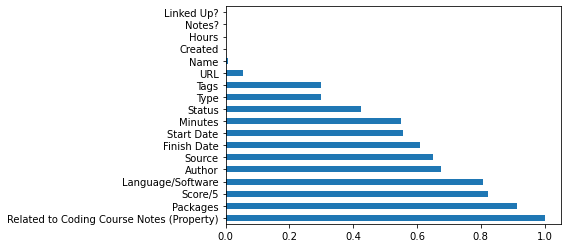

In [6]:
missing_percentages.plot(kind='barh')


### Changing Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Type                                       106 non-null    object 
 1   Name                                       150 non-null    object 
 2   Language/Software                          29 non-null     object 
 3   Packages                                   13 non-null     object 
 4   Tags                                       106 non-null    object 
 5   Author                                     49 non-null     object 
 6   Created                                    151 non-null    object 
 7   Status                                     87 non-null     object 
 8   Score/5                                    27 non-null     object 
 9   URL                                        143 non-null    object 
 10  Source                    

In [8]:
#Minutes, Hours should be float
pd.to_numeric(df["Minutes"], errors='coerce').fillna(0)
pd.to_numeric(df["Hours"], errors='coerce').fillna(0)

0      4.000000
1      3.000000
2      0.213333
3      0.527500
4      0.333333
         ...   
146    0.466667
147    0.258500
148    0.125000
149    0.000000
150    0.933333
Name: Hours, Length: 151, dtype: float64

In [9]:
#Created, Finish Date, Start Date should be datetime
df['Created'] = pd.to_datetime(df["Created"], errors='raise', format="%B %d, %Y %I:%M %p")
df['Finish Date'] = pd.to_datetime(df["Finish Date"], errors='raise', format="%B %d, %Y")
df['Start Date'] = pd.to_datetime(df["Start Date"], errors='raise', format="%B %d, %Y")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Type                                       106 non-null    object        
 1   Name                                       150 non-null    object        
 2   Language/Software                          29 non-null     object        
 3   Packages                                   13 non-null     object        
 4   Tags                                       106 non-null    object        
 5   Author                                     49 non-null     object        
 6   Created                                    151 non-null    datetime64[ns]
 7   Status                                     87 non-null     object        
 8   Score/5                                    27 non-null     object        
 9   URL                  

In [11]:
df['Finish Date'].dt.month_name()

0            NaN
1       February
2       February
3       February
4       February
         ...    
146    September
147    September
148    September
149          NaN
150          NaN
Name: Finish Date, Length: 151, dtype: object

In [12]:
df.tail()

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Score/5,URL,Source,Minutes,Finish Date,Start Date,Hours,Notes?,Linked Up?,Related to Coding Course Notes (Property)
146,Video,Data Science Project from Scratch - Part 2 (Da...,NaN,NaN,"DS Projects, Data Science",Ken Jee,2021-12-21 17:58:00,Finished,⭐️⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=GmW4F6MHqqs,NaN,28.00,2020-09-23,2020-09-23,0.466667,No,No,NaN
147,Video,(50) The Second Brain - A Life-Changing Produc...,NaN,NaN,Productivity,NaN,2021-12-21 17:58:00,Finished,NaN,https://www.youtube.com/watch?v=OP3dA2GcAh8,NaN,15.51,2020-09-25,2020-09-25,0.258500,No,No,NaN
148,Video,Data Science Project from Scratch - Part 1 (Pr...,NaN,NaN,"DS Projects, Data Science",Ken Jee,2021-12-21 17:58:00,Finished,⭐️⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=MpF9HENQjDo,NaN,7.50,2020-09-23,2020-09-23,0.125000,No,No,NaN
149,Book,Data Newbie to Guru: The Visual Guide to Learn...,NaN,NaN,"Data Science, SQL",Dr. Chantel Perry,2021-12-21 17:58:00,Started,NaN,NaN,NaN,NaN,NaT,2020-07-31,0.000000,No,No,NaN
150,Podcast,Build Your Brand in Data Science,NaN,NaN,Data Science,NaN,2021-12-21 17:58:00,NaN,NaN,https://podcasts.apple.com/us/podcast/50-ken-j...,NaN,56.00,NaT,2020-09-23,0.933333,No,No,NaN


I'll only be analyzing observations that I completed (Status = Finished) and that were done during the #66DaysofData challenge. Those are tagged #66DaysofData

### Dropping Unnecessary Columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Type                                       106 non-null    object        
 1   Name                                       150 non-null    object        
 2   Language/Software                          29 non-null     object        
 3   Packages                                   13 non-null     object        
 4   Tags                                       106 non-null    object        
 5   Author                                     49 non-null     object        
 6   Created                                    151 non-null    datetime64[ns]
 7   Status                                     87 non-null     object        
 8   Score/5                                    27 non-null     object        
 9   URL                  

In [14]:
df = df.drop(["Related to Coding Course Notes (Property)", "Linked Up?", "Notes?", "Score/5", "URL"], axis=1)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Type               106 non-null    object        
 1   Name               150 non-null    object        
 2   Language/Software  29 non-null     object        
 3   Packages           13 non-null     object        
 4   Tags               106 non-null    object        
 5   Author             49 non-null     object        
 6   Created            151 non-null    datetime64[ns]
 7   Status             87 non-null     object        
 8   Source             53 non-null     object        
 9   Minutes            68 non-null     float64       
 10  Finish Date        59 non-null     datetime64[ns]
 11  Start Date         67 non-null     datetime64[ns]
 12  Hours              151 non-null    float64       
dtypes: datetime64[ns](3), float64(2), object(8)
memory usage: 15.5+ K

# Renaming Columns

In [16]:
df.rename(columns = {'Finish Date': 'Finish_Date', 'Start Date': 'Start_Date'}, inplace = True)


In [17]:
df.columns

Index(['Type', 'Name', 'Language/Software', 'Packages', 'Tags', 'Author',
       'Created', 'Status', 'Source', 'Minutes', 'Finish_Date', 'Start_Date',
       'Hours'],
      dtype='object')

In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


2

In [19]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Packages             0.913907
Language/Software    0.807947
Author               0.675497
Source               0.649007
Finish_Date          0.609272
Start_Date           0.556291
Minutes              0.549669
Status               0.423841
Type                 0.298013
Tags                 0.298013
Name                 0.006623
Created              0.000000
Hours                0.000000
dtype: float64

<AxesSubplot:>

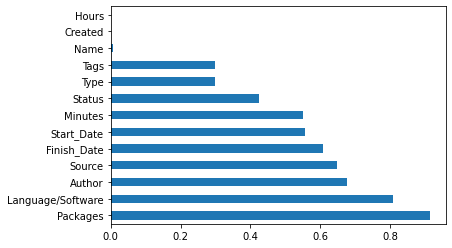

In [20]:
missing_percentages.plot(kind='barh')


In [21]:
df.describe()

,Minutes,Hours
count,68.000000,151.000000
mean,60.645147,0.455173
std,110.872873,1.334087
min,1.000000,0.000000
25%,9.832500,0.000000
50%,18.750000,0.000000
75%,56.250000,0.262583
max,739.900000,12.331667


In [22]:
df.head(3)

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
0,Course,Cleaning Data in Python,Python,NaN,NaN,NaN,2022-02-23 23:22:00,Not Started,DataCamp,240.0,NaT,2022-02-24,4.000000
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,2022-02-23 00:18:00,Finished,DataCamp,180.0,2022-02-23,2022-02-23,3.000000
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.8,2022-02-22,2022-02-22,0.213333


In [23]:
#df[(df["Status"] == "Finished") & (df["Tags"] =='#66DaysofData, Career, Round1, Tableau')]
#dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33)]


,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.8,2022-02-22,2022-02-22,0.213333


## Filter the df for status = finished and tag containing 66daysofdata

In [126]:
df = df[df["Tags"].str.contains("#66DaysofData", na=False)]
df.head()

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,2022-02-23 00:18:00,Finished,DataCamp,180.00,2022-02-23,2022-02-23,3.000000
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.80,2022-02-22,2022-02-22,0.213333
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,2022-02-22 17:47:00,Finished,YouTube,31.65,2022-02-22,2022-02-17,0.527500
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,2022-02-11 23:45:00,Finished,Medium,20.00,2022-02-12,2022-02-12,0.333333
5,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 20:35:00,Finished,NaN,5.00,2022-02-11,2022-02-11,0.083333


In [127]:
df = df[(df["Status"] == "Finished")]
df.head()

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,2022-02-23 00:18:00,Finished,DataCamp,180.00,2022-02-23,2022-02-23,3.000000
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.80,2022-02-22,2022-02-22,0.213333
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,2022-02-22 17:47:00,Finished,YouTube,31.65,2022-02-22,2022-02-17,0.527500
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,2022-02-11 23:45:00,Finished,Medium,20.00,2022-02-12,2022-02-12,0.333333
5,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 20:35:00,Finished,NaN,5.00,2022-02-11,2022-02-11,0.083333


In [128]:
tag_count = df.copy()
tag_count = pd.concat([tag_count, df["Tags"].str.split(",", expand=True)], axis=1)
tag_count = tag_count.melt(id_vars=["Type", "Name", "Language/Software", "Packages", "Author",
                           "Status", "Source", "Hours", "Minutes", "Finish_Date"], value_vars=range(8), value_name="tag")
tag_count = tag_count[tag_count["tag"].notna()]
tag_count['tag'] = tag_count['tag'].str.strip()
tag_count


,Type,Name,Language/Software,Packages,Author,Status,Source,Hours,Minutes,Finish_Date,variable,tag
0,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request",NaN,Finished,DataCamp,3.000000,180.00,2022-02-23,0,#66DaysofData
1,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,Alex the Analyst,Finished,YouTube,0.213333,12.80,2022-02-22,0,#66DaysofData
2,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,Tableau Tim,Finished,YouTube,0.527500,31.65,2022-02-22,0,#66DaysofData
3,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,Towards Data Science,Finished,Medium,0.333333,20.00,2022-02-12,0,#66DaysofData
4,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,NaN,Finished,NaN,0.083333,5.00,2022-02-11,0,#66DaysofData
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.00,2022-01-12,5,Round1
264,Course,Intro to Data Visualization with Seaborn,Python,seaborn,NaN,Finished,DataCamp,4.000000,240.00,2022-01-18,6,seaborn
284,Article,Use Python To Scrape & Visualize Likes On Your...,Python,Selenium,Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.00,2021-12-31,6,Selenium
292,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.00,2022-01-12,6,matplotlib


In [129]:
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "#66DaysofData"])
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "Round 1"])
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "Round1"])
tag_count

,Type,Name,Language/Software,Packages,Author,Status,Source,Hours,Minutes,Finish_Date,variable,tag
42,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request",NaN,Finished,DataCamp,3.000000,180.0,2022-02-23,1,APIs
43,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,Alex the Analyst,Finished,YouTube,0.213333,12.8,2022-02-22,1,Career
45,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,Towards Data Science,Finished,Medium,0.333333,20.0,2022-02-12,1,Data Analysis
46,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,NaN,Finished,NaN,0.083333,5.0,2022-02-11,1,Data Visualization
47,Video,Tableau animation in five minutes - 5.1 mins,Tableau,NaN,NaN,Finished,YouTube,0.085000,5.1,2022-02-11,1,Data Visualization
...,...,...,...,...,...,...,...,...,...,...,...,...
220,Course,Introduction to Importing Data in Python,Python,"numpy, pandas, scipy, sqlalchemy",NaN,Finished,DataCamp,3.000000,180.0,2022-02-22,5,SQL
264,Course,Intro to Data Visualization with Seaborn,Python,seaborn,NaN,Finished,DataCamp,4.000000,240.0,2022-01-18,6,seaborn
284,Article,Use Python To Scrape & Visualize Likes On Your...,Python,Selenium,Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.0,2021-12-31,6,Selenium
292,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.0,2022-01-12,6,matplotlib


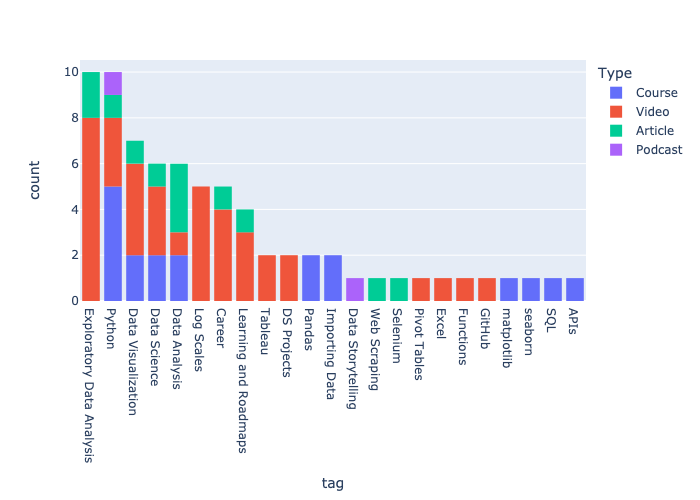

In [132]:
fig = px.histogram(tag_count, x="tag", color="Type").update_xaxes(categoryorder="total descending")
fig.show("png")


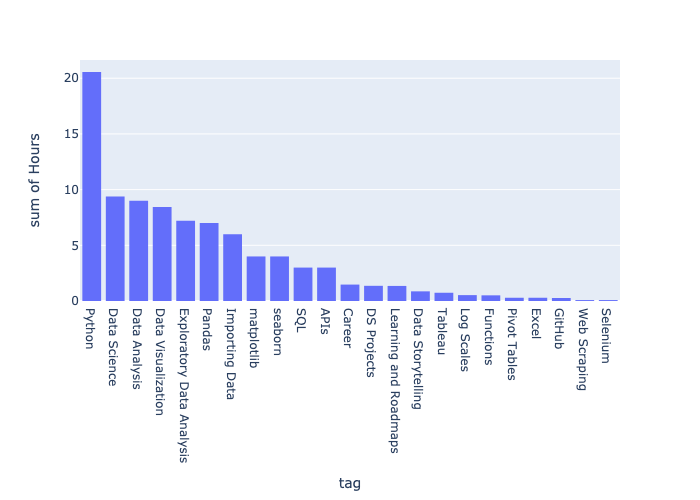

In [133]:
fig =px.histogram(tag_count, x="tag", y="Hours").update_xaxes(categoryorder="total descending")
fig.show("png")


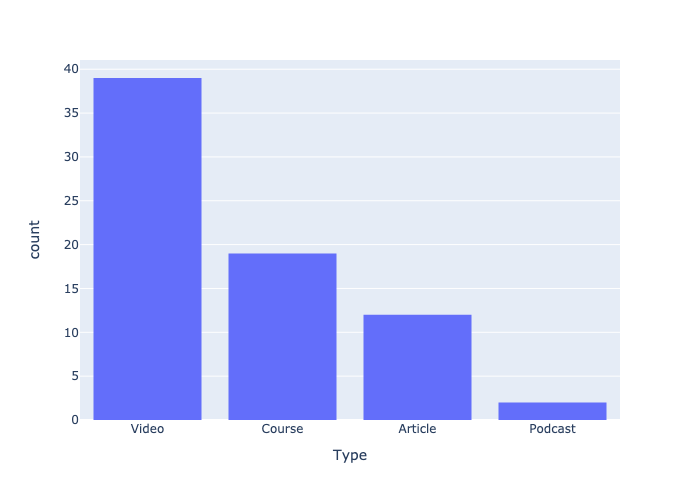

In [134]:
fig = px.histogram(tag_count, x="Type").update_xaxes(categoryorder="total descending")
fig.show("png")


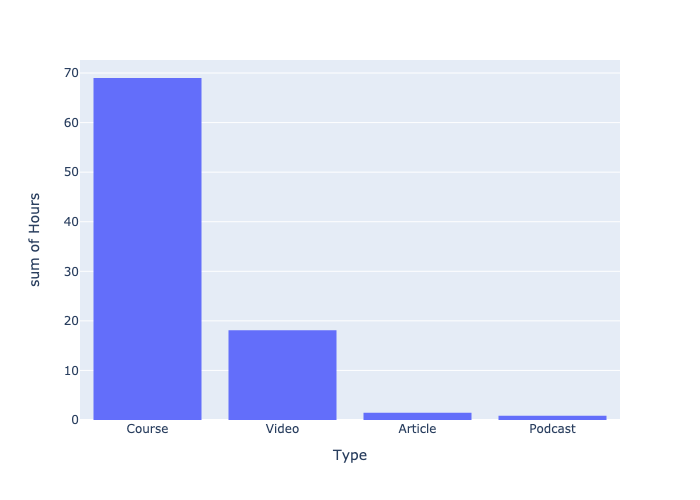

In [136]:
fig = px.histogram(tag_count, x="Type", y="Hours").update_xaxes(categoryorder="total descending")
fig.show("png")


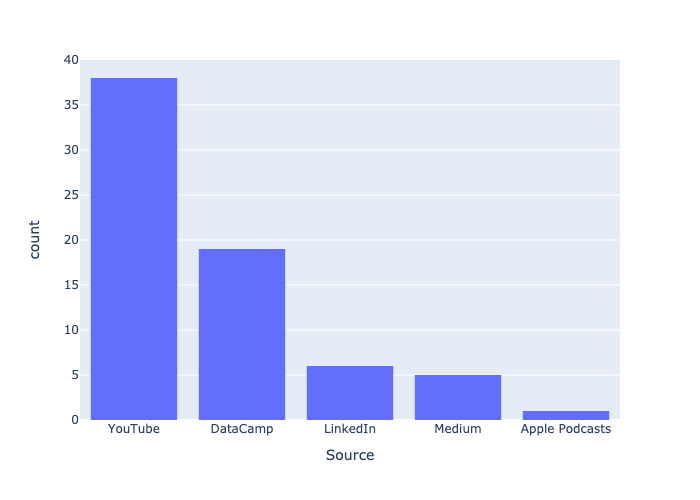

In [137]:
fig = px.histogram(tag_count, x="Source").update_xaxes(categoryorder="total descending")
fig.show("png")


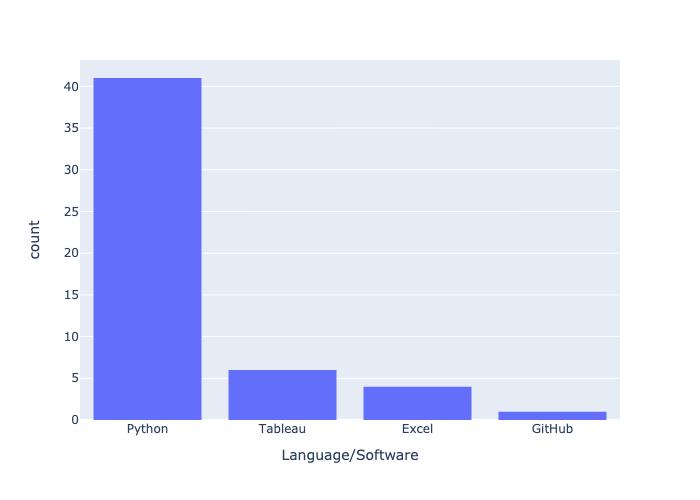

In [138]:
fig = px.histogram(tag_count, x="Language/Software").update_xaxes(categoryorder="total descending")
fig.show("png")


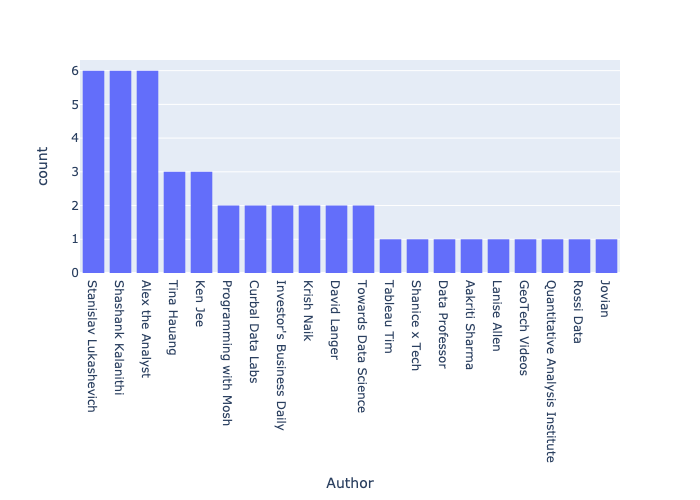

In [139]:
fig = px.histogram(tag_count, x="Author").update_xaxes(categoryorder="total descending")
fig.show("png")


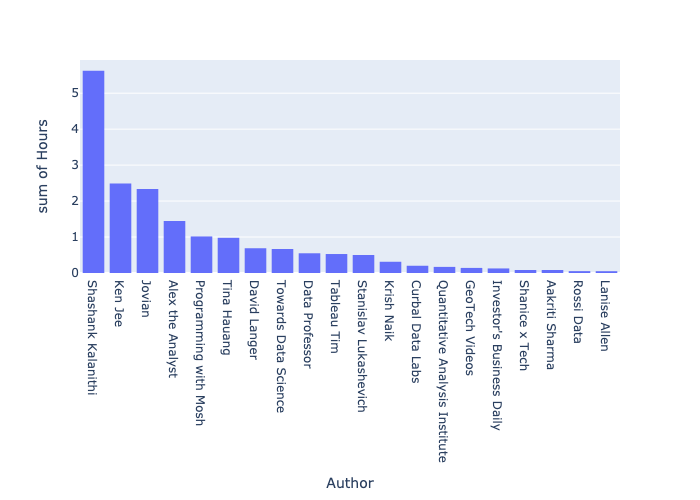

In [140]:
fig = px.histogram(tag_count, x="Author", y="Hours").update_xaxes(categoryorder="total descending")
fig.show("png")


## Finito

In [141]:
#df["Language/Software"].unique()

Since there is a value than contains multiple languages/software, I want to split those out so that we can accurately explore that data

In [142]:
#df["Language/Software"].str.split(",", expand=True)


In [143]:
#language_count = df.copy()
#language_count = pd.concat([language_count, df["Language/Software"].str.split(",", expand=True)], axis=1)
#language_count = language_count.melt(id_vars=["Type", "Name", "Source", "Hours", "Finish_Date", "Author", "Start_Date", "Tags"], value_vars=range(3), value_name="language/software")
#language_count = language_count[language_count["language/software"].notna()]
#language_count




In [144]:
#language_count["language/software"].unique()

In [145]:
#language_count.info()

In [146]:
#sns.catplot(x='language/software', data=language_count, kind='count')


In [147]:
#px.histogram(language_count, "language/software")

In [148]:
#df["Packages"].unique()


In [149]:
#df["Packages"].str.split(",", expand=True)


In [157]:
package_count = df.copy()
package_count = pd.concat([package_count, df["Packages"].str.split(",", expand=True)], axis=1)
package_count = package_count.melt(id_vars=["Type", "Name", "Language/Software", "Tags", "Author","Status", "Source", "Hours", "Minutes", "Finish_Date"], value_vars=range(4), value_name="packages")
package_count = package_count[package_count["packages"].notna()]
package_count['packages'] = package_count['packages'].str.strip()
package_count

,Type,Name,Language/Software,Tags,Author,Status,Source,Hours,Minutes,Finish_Date,variable,packages
0,Course,Intermediate Importing Data in Python,Python,"#66DaysofData, APIs, Importing Data, Python, R...",NaN,Finished,DataCamp,3.000000,180.0,2022-02-23,0,BeautifulSoup
3,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,Finished,Medium,0.333333,20.0,2022-02-12,0,pandas
7,Video,Data Analysis on a Kaggle's Dataset - 29.9 mins,Python,"#66DaysofData, Data Analysis, Exploratory Data...",NaN,Finished,YouTube,0.498333,29.9,2022-02-10,0,pandas
10,Course,Introduction to Importing Data in Python,Python,"#66DaysofData, Importing Data, Pandas, Python,...",NaN,Finished,DataCamp,3.000000,180.0,2022-02-22,0,numpy
12,Course,Intro to Data Visualization with Seaborn,Python,"#66DaysofData, Data Analysis, Data Science, Da...",NaN,Finished,DataCamp,4.000000,240.0,2022-01-18,0,seaborn
18,Video,Build an Exploratory Data Analysis Project fro...,Python,"#66DaysofData, Exploratory Data Analysis, Round1",Jovian,Finished,YouTube,2.336667,140.2,2022-01-03,0,numpy
24,Video,How To Become Expertise in Exploratory Data An...,Python,"#66DaysofData, Exploratory Data Analysis, Round1",Krish Naik,Finished,YouTube,0.168333,10.1,2022-01-01,0,matplotlib
25,Video,Data Science Project from Scratch - Part 4 (Ex...,Python,"#66DaysofData, DS Projects, Exploratory Data A...",Ken Jee,Finished,YouTube,1.143333,68.6,2022-01-01,0,matplotlib
30,Video,Exploratory Data Analysis (comment your best i...,Python,"#66DaysofData, Exploratory Data Analysis, Pyth...",Shashank Kalanithi,Finished,YouTube,0.981667,58.9,2021-12-31,0,pandas
32,Article,Use Python To Scrape & Visualize Likes On Your...,Python,"#66DaysofData, Data Analysis, Data Science, Ex...",Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.0,2021-12-31,0,Selenium


In [158]:
package_count["packages"].unique()

array(['BeautifulSoup', 'pandas', 'numpy', 'seaborn', 'matplotlib',
       'Selenium', 'Tweepy', 'json', 'scipy', 'request', 'sqlalchemy'],
      dtype=object)

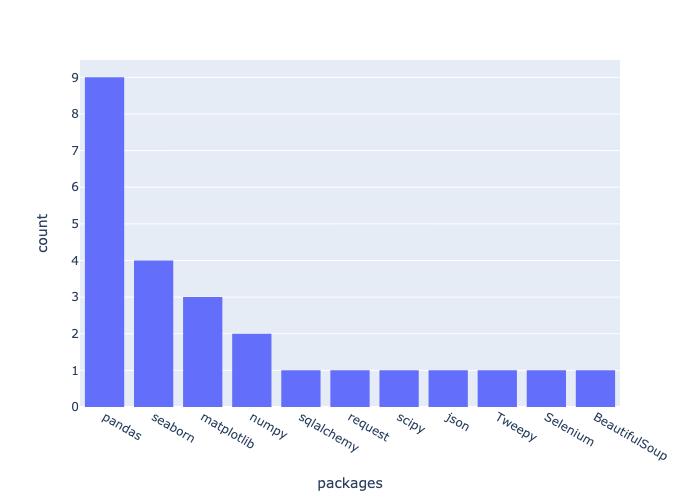

In [160]:
fig = px.histogram(package_count, x="packages").update_xaxes(categoryorder="total descending")
fig.show("png")


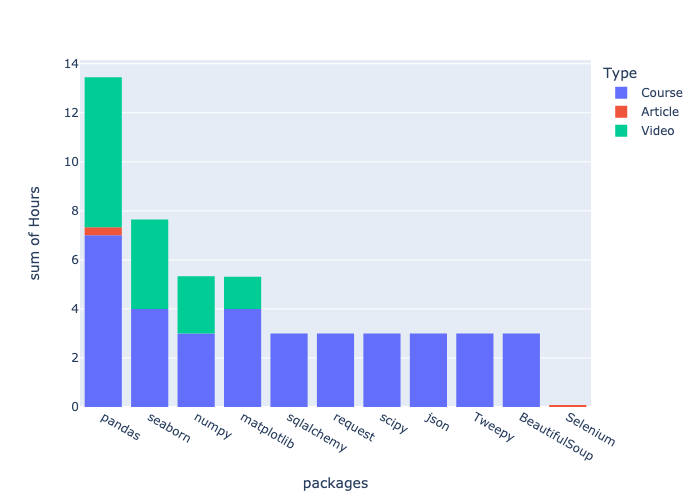

In [162]:
fig = px.histogram(package_count, x="packages", y="Hours", color="Type").update_xaxes(categoryorder="total descending")
fig.show("png")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'BeautifulSoup'),
  Text(1, 0, 'pandas'),
  Text(2, 0, 'numpy'),
  Text(3, 0, 'seaborn'),
  Text(4, 0, 'matplotlib'),
  Text(5, 0, 'Selenium'),
  Text(6, 0, 'Tweepy'),
  Text(7, 0, 'json'),
  Text(8, 0, 'scipy'),
  Text(9, 0, 'request'),
  Text(10, 0, 'sqlalchemy')])

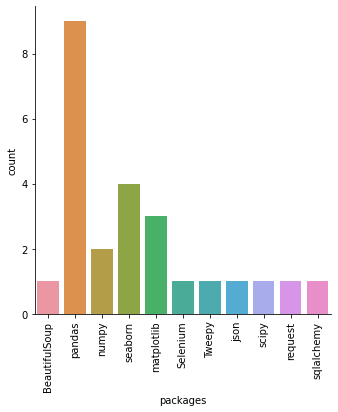

In [159]:
ax = sns.catplot(x='packages', data=package_count, kind='count')
plt.xticks(rotation=90)

### pandas and seaborn showed up twice due toa space before the package name in some instances. I need to get rid of them.

In [43]:
pd.crosstab(package_count['packages'],columns='count')

col_0,count
packages,
Tweepy,1
json,1
pandas,4
request,1
scipy,1
seaborn,3
sqlalchemy,1
BeautifulSoup,1
Selenium,1


In [33]:
df["Tags"].unique()


array([nan, '#66DaysofData, APIs, Importing Data, Python, Round1',
       '#66DaysofData, Career, Round1, Tableau',
       '#66DaysofData, Round1, Tableau',
       '#66DaysofData, Data Analysis, Exploratory Data Analysis, Round1',
       '#66DaysofData, Data Visualization, Round1',
       '#66DaysofData, Round1', '#66DaysofData, GitHub, Round1',
       '#66DaysofData, Importing Data, Pandas, Python, Round1, SQL',
       '#66DaysofData, Python, Round1', 'Data Visualization',
       '#66DaysofData, Data Analysis, Data Science, Data Visualization, Python, Round1, seaborn',
       '#66DaysofData, Exploratory Data Analysis, Round1',
       '#66DaysofData, Career, Round1',
       '#66DaysofData, Career, Learning and Roadmaps, Round1',
       '#66DaysofData, Log Scales, Round1',
       '#66DaysofData, Data Visualization, Log Scales, Round1',
       'Learning and Roadmaps', '#66DaysofData, DS Projects, Round1',
       '#66DaysofData, DS Projects, Exploratory Data Analysis, Round1',
       '#66

In [34]:
df["Tags"].str.split(",", expand=True)

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#66DaysofData,APIs,Importing Data,Python,Round1,None,None,None,None,None,None
2,#66DaysofData,Career,Round1,Tableau,None,None,None,None,None,None,None
3,#66DaysofData,Round1,Tableau,None,None,None,None,None,None,None,None
4,#66DaysofData,Data Analysis,Exploratory Data Analysis,Round1,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
146,DS Projects,Data Science,None,None,None,None,None,None,None,None,None
147,Productivity,None,None,None,None,None,None,None,None,None,None
148,DS Projects,Data Science,None,None,None,None,None,None,None,None,None
149,Data Science,SQL,None,None,None,None,None,None,None,None,None


In [60]:
tag_count = df.copy()
tag_count = pd.concat([tag_count, df["Tags"].str.split(",", expand=True)], axis=1)
tag_count = tag_count.melt(id_vars=["Type", "Name", "Source", "Hours", "Finish_Date", "Author", "Start_Date", "Language/Software", "Status"], value_vars=range(11), value_name="tag")
tag_count = tag_count[tag_count["tag"].notna()]
tag_count['tag'] = tag_count['tag'].str.strip() 
tag_count

,Type,Name,Source,Hours,Finish_Date,Author,Start_Date,Language/Software,Status,variable,tag
1,Course,Intermediate Importing Data in Python,DataCamp,3.000000,2022-02-23,NaN,2022-02-23,Python,Finished,0,#66DaysofData
2,Video,Tableau Data Analyst Certification Review - 12...,YouTube,0.213333,2022-02-22,Alex the Analyst,2022-02-22,Tableau,Finished,0,#66DaysofData
3,Video,How to learn Tableau in 2022: Full platform gu...,YouTube,0.527500,2022-02-22,Tableau Tim,2022-02-17,Tableau,Finished,0,#66DaysofData
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Medium,0.333333,2022-02-12,Towards Data Science,2022-02-12,Python,Finished,0,#66DaysofData
5,Article,Create Maps that Show Ratio or Aggregated Data...,NaN,0.083333,2022-02-11,NaN,2022-02-11,Tableau,Finished,0,#66DaysofData
...,...,...,...,...,...,...,...,...,...,...,...
1109,Article,Use Python To Scrape & Visualize Likes On Your...,LinkedIn,0.083333,2021-12-31,Stanislav Lukashevich,2021-12-31,Python,Finished,7,Web Scraping
1139,Article,5 Online Courses I Took as a Self-Taught Data ...,NaN,0.000000,NaT,Christopher Zita,NaT,NaN,NaN,7,R Programmaing Language
1290,Article,5 Online Courses I Took as a Self-Taught Data ...,NaN,0.000000,NaT,Christopher Zita,NaT,NaN,NaN,8,SQL
1441,Article,5 Online Courses I Took as a Self-Taught Data ...,NaN,0.000000,NaT,Christopher Zita,NaT,NaN,NaN,9,Tableau


In [61]:
tag_count["tag"].unique()


array(['#66DaysofData', 'Data Visualization', 'Learning and Roadmaps',
       'DS Projects', 'Data Science', 'Data Storytelling', 'Python',
       'Datasets', 'Interviews', 'Data Analysis', 'Coding',
       'Machine Learning', 'AI', 'Productivity', 'Organisation',
       'Object Oriented Programming', 'APIs', 'Career', 'Round1',
       'GitHub', 'Importing Data', 'Exploratory Data Analysis',
       'Log Scales', 'Functions', 'Excel', 'Pandas', 'SQL', 'Tableau',
       'Pivot Tables', 'R Programmaing Language', 'Regularization',
       'Time Series Analysis', 'seaborn', 'Selenium', 'matplotlib',
       'Web Scraping', 'Udemy'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '#66DaysofData'),
  Text(1, 0, 'Round1'),
  Text(2, 0, 'Data Science'),
  Text(3, 0, 'Python'),
  Text(4, 0, 'Exploratory Data Analysis'),
  Text(5, 0, 'Data Analysis'),
  Text(6, 0, 'Machine Learning'),
  Text(7, 0, 'DS Projects'),
  Text(8, 0, 'Data Visualization'),
  Text(9, 0, 'Learning and Roadmaps'),
  Text(10, 0, 'Pandas'),
  Text(11, 0, 'Career'),
  Text(12, 0, 'Log Scales'),
  Text(13, 0, 'SQL'),
  Text(14, 0, 'Interviews'),
  Text(15, 0, 'Productivity'),
  Text(16, 0, 'Tableau'),
  Text(17, 0, 'R Programmaing Language'),
  Text(18, 0, 'Excel'),
  Text(19, 0, 'Coding'),
  Text(20, 0, 'Datasets'),
  Text(21, 0, 'Importing Data'),
  Text(22, 0, 'Data Storytelling'),
  Text(23, 0, 'Selenium'),
  Text(24, 0, 'Time Series Analysis'),
  Text(25, 0, 'seaborn'),
  Text(26, 0, 'matplotlib'),
  Text(27,

<Figure size 1440x360 with 0 Axes>

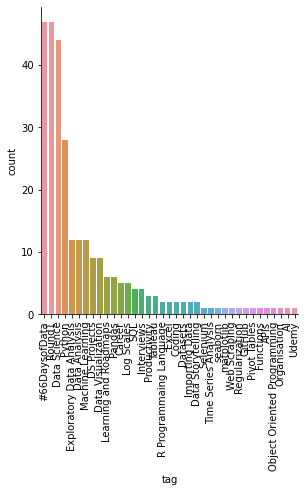

In [62]:
#plot_order = tag_count.groupby("tag").sum().sort_values(ascending=False).index.values
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace = 0.8)
ax = sns.catplot(x='tag', data=tag_count, kind='count', order=tag_count.tag.value_counts().index)
plt.xticks(rotation=90)

In [63]:
pd.crosstab(tag_count['tag'],columns='count')

col_0,count
tag,
#66DaysofData,47
AI,1
APIs,1
Career,5
Coding,2
DS Projects,9
Data Analysis,12
Data Science,44
Data Storytelling,2


In [67]:
df2 = tag_count[(tag_count["Status"] == "Finished") & (tag_count["tag"] == "#66DaysofData")]

In [68]:
df2.head()


,Type,Name,Source,Hours,Finish_Date,Author,Start_Date,Language/Software,Status,variable,tag
1,Course,Intermediate Importing Data in Python,DataCamp,3.000000,2022-02-23,NaN,2022-02-23,Python,Finished,0,#66DaysofData
2,Video,Tableau Data Analyst Certification Review - 12...,YouTube,0.213333,2022-02-22,Alex the Analyst,2022-02-22,Tableau,Finished,0,#66DaysofData
3,Video,How to learn Tableau in 2022: Full platform gu...,YouTube,0.527500,2022-02-22,Tableau Tim,2022-02-17,Tableau,Finished,0,#66DaysofData
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Medium,0.333333,2022-02-12,Towards Data Science,2022-02-12,Python,Finished,0,#66DaysofData
5,Article,Create Maps that Show Ratio or Aggregated Data...,NaN,0.083333,2022-02-11,NaN,2022-02-11,Tableau,Finished,0,#66DaysofData


In [69]:
df2["Language/Software"].unique()

array(['Python', 'Tableau', nan, 'GitHub', 'Excel'], dtype=object)

In [71]:
df3 = df[df["Tags"].str.contains("#66DaysofData", na=False)]
df3

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,2022-02-23 00:18:00,Finished,DataCamp,180.00,2022-02-23,2022-02-23,3.000000
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.80,2022-02-22,2022-02-22,0.213333
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,2022-02-22 17:47:00,Finished,YouTube,31.65,2022-02-22,2022-02-17,0.527500
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,2022-02-11 23:45:00,Finished,Medium,20.00,2022-02-12,2022-02-12,0.333333
5,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 20:35:00,Finished,NaN,5.00,2022-02-11,2022-02-11,0.083333
6,Video,Tableau animation in five minutes - 5.1 mins,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 19:47:00,Finished,YouTube,5.10,2022-02-11,2022-02-11,0.085000
7,Video,How To Make An Animated Map In Tableau (Tutori...,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 19:46:00,Finished,YouTube,6.80,2022-02-11,2022-02-11,0.113333
9,Video,Data Analysis on a Kaggle's Dataset - 29.9 mins,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",NaN,2022-02-09 20:47:00,Finished,YouTube,29.90,2022-02-10,2022-02-10,0.498333
10,Video,Good coding habits to start developing NOW - 1...,NaN,NaN,"#66DaysofData, Round1",Tina Hauang,2022-02-09 18:22:00,Finished,YouTube,13.50,2022-02-09,2022-02-09,0.225000
11,Video,Visual Studio Code | How to use git and github...,GitHub,NaN,"#66DaysofData, GitHub, Round1",NaN,2022-02-06 10:20:00,Finished,YouTube,16.30,2022-02-06,2022-02-06,0.271667


In [87]:
df3 = df3[(df3["Status"] == "Finished")]
df3

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,2022-02-23 00:18:00,Finished,DataCamp,180.00,2022-02-23,2022-02-23,3.000000
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.80,2022-02-22,2022-02-22,0.213333
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,2022-02-22 17:47:00,Finished,YouTube,31.65,2022-02-22,2022-02-17,0.527500
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,2022-02-11 23:45:00,Finished,Medium,20.00,2022-02-12,2022-02-12,0.333333
5,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 20:35:00,Finished,NaN,5.00,2022-02-11,2022-02-11,0.083333
6,Video,Tableau animation in five minutes - 5.1 mins,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 19:47:00,Finished,YouTube,5.10,2022-02-11,2022-02-11,0.085000
7,Video,How To Make An Animated Map In Tableau (Tutori...,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 19:46:00,Finished,YouTube,6.80,2022-02-11,2022-02-11,0.113333
9,Video,Data Analysis on a Kaggle's Dataset - 29.9 mins,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",NaN,2022-02-09 20:47:00,Finished,YouTube,29.90,2022-02-10,2022-02-10,0.498333
10,Video,Good coding habits to start developing NOW - 1...,NaN,NaN,"#66DaysofData, Round1",Tina Hauang,2022-02-09 18:22:00,Finished,YouTube,13.50,2022-02-09,2022-02-09,0.225000
11,Video,Visual Studio Code | How to use git and github...,GitHub,NaN,"#66DaysofData, GitHub, Round1",NaN,2022-02-06 10:20:00,Finished,YouTube,16.30,2022-02-06,2022-02-06,0.271667


In [88]:
len(df3)

42

In [89]:
df3.Tags.describe()

count                                                   42
unique                                                  27
top       #66DaysofData, Exploratory Data Analysis, Round1
freq                                                     4
Name: Tags, dtype: object

In [73]:
df3.Tags.unique()

array(['#66DaysofData, APIs, Importing Data, Python, Round1',
       '#66DaysofData, Career, Round1, Tableau',
       '#66DaysofData, Round1, Tableau',
       '#66DaysofData, Data Analysis, Exploratory Data Analysis, Round1',
       '#66DaysofData, Data Visualization, Round1',
       '#66DaysofData, Round1', '#66DaysofData, GitHub, Round1',
       '#66DaysofData, Importing Data, Pandas, Python, Round1, SQL',
       '#66DaysofData, Python, Round1',
       '#66DaysofData, Data Analysis, Data Science, Data Visualization, Python, Round1, seaborn',
       '#66DaysofData, Exploratory Data Analysis, Round1',
       '#66DaysofData, Career, Round1',
       '#66DaysofData, Career, Learning and Roadmaps, Round1',
       '#66DaysofData, Log Scales, Round1',
       '#66DaysofData, Data Visualization, Log Scales, Round1',
       '#66DaysofData, DS Projects, Round1',
       '#66DaysofData, DS Projects, Exploratory Data Analysis, Round1',
       '#66DaysofData, Learning and Roadmaps, Round1',
       '

# Start over lol
1. Get all of the observations that contain #66DaysofData in the Tags column using .contains()
2. Maybe split the Tags column to get all of the unique tags that were a part of #66DaysofData
3. Add those unique tags to a list
4. Run .value_counts() on that list?

# df3 is currently filtered for status == Finished and tag containing #66DaysofData

In [94]:
tag_count = df3.copy()
tag_count = pd.concat([tag_count, df3["Tags"].str.split(",", expand=True)], axis=1)
tag_count = tag_count.melt(id_vars=["Type", "Name", "Language/Software", "Packages", "Author", "Status", "Source", "Hours", "Minutes", "Finish_Date"], value_vars=range(8), value_name="tag")
tag_count = tag_count[tag_count["tag"].notna()]
tag_count['tag'] = tag_count['tag'].str.strip()
tag_count


,Type,Name,Language/Software,Packages,Author,Status,Source,Hours,Minutes,Finish_Date,variable,tag
0,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request",NaN,Finished,DataCamp,3.000000,180.00,2022-02-23,0,#66DaysofData
1,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,Alex the Analyst,Finished,YouTube,0.213333,12.80,2022-02-22,0,#66DaysofData
2,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,Tableau Tim,Finished,YouTube,0.527500,31.65,2022-02-22,0,#66DaysofData
3,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,Towards Data Science,Finished,Medium,0.333333,20.00,2022-02-12,0,#66DaysofData
4,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,NaN,Finished,NaN,0.083333,5.00,2022-02-11,0,#66DaysofData
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.00,2022-01-12,5,Round1
264,Course,Intro to Data Visualization with Seaborn,Python,seaborn,NaN,Finished,DataCamp,4.000000,240.00,2022-01-18,6,seaborn
284,Article,Use Python To Scrape & Visualize Likes On Your...,Python,Selenium,Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.00,2021-12-31,6,Selenium
292,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.00,2022-01-12,6,matplotlib


In [99]:
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "#66DaysofData"])
tag_count

,Type,Name,Language/Software,Packages,Author,Status,Source,Hours,Minutes,Finish_Date,variable,tag
42,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request",NaN,Finished,DataCamp,3.000000,180.00,2022-02-23,1,APIs
43,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,Alex the Analyst,Finished,YouTube,0.213333,12.80,2022-02-22,1,Career
44,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,Tableau Tim,Finished,YouTube,0.527500,31.65,2022-02-22,1,Round1
45,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,Towards Data Science,Finished,Medium,0.333333,20.00,2022-02-12,1,Data Analysis
46,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,NaN,Finished,NaN,0.083333,5.00,2022-02-11,1,Data Visualization
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.00,2022-01-12,5,Round1
264,Course,Intro to Data Visualization with Seaborn,Python,seaborn,NaN,Finished,DataCamp,4.000000,240.00,2022-01-18,6,seaborn
284,Article,Use Python To Scrape & Visualize Likes On Your...,Python,Selenium,Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.00,2021-12-31,6,Selenium
292,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.00,2022-01-12,6,matplotlib


In [101]:
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "Round 1"])
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "Round1"])
tag_count


,Type,Name,Language/Software,Packages,Author,Status,Source,Hours,Minutes,Finish_Date,variable,tag
42,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request",NaN,Finished,DataCamp,3.000000,180.0,2022-02-23,1,APIs
43,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,Alex the Analyst,Finished,YouTube,0.213333,12.8,2022-02-22,1,Career
45,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,Towards Data Science,Finished,Medium,0.333333,20.0,2022-02-12,1,Data Analysis
46,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,NaN,Finished,NaN,0.083333,5.0,2022-02-11,1,Data Visualization
47,Video,Tableau animation in five minutes - 5.1 mins,Tableau,NaN,NaN,Finished,YouTube,0.085000,5.1,2022-02-11,1,Data Visualization
...,...,...,...,...,...,...,...,...,...,...,...,...
220,Course,Introduction to Importing Data in Python,Python,"numpy, pandas, scipy, sqlalchemy",NaN,Finished,DataCamp,3.000000,180.0,2022-02-22,5,SQL
264,Course,Intro to Data Visualization with Seaborn,Python,seaborn,NaN,Finished,DataCamp,4.000000,240.0,2022-01-18,6,seaborn
284,Article,Use Python To Scrape & Visualize Likes On Your...,Python,Selenium,Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.0,2021-12-31,6,Selenium
292,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.0,2022-01-12,6,matplotlib


In [104]:
px.histogram(tag_count, x="tag", color="Type").update_xaxes(categoryorder="total descending")

In [106]:
px.histogram(tag_count, x="tag", y="Hours").update_xaxes(categoryorder="total descending")


In [125]:
px.histogram(tag_count, x="Type").update_xaxes(
    categoryorder="total descending")


In [122]:
px.histogram(tag_count, x="Type", y="Hours").update_xaxes(
    categoryorder="total descending")


In [107]:
px.histogram(tag_count, x="Source").update_xaxes(categoryorder="total descending")


In [108]:
px.histogram(tag_count, x="Language/Software").update_xaxes(categoryorder="total descending")


In [116]:
px.histogram(tag_count, x="Author").update_xaxes(categoryorder="total descending")


In [119]:
px.histogram(tag_count, x="Author", y="Hours").update_xaxes(
    categoryorder="total descending")


In [110]:
px.histogram(tag_count, x="Packages").update_xaxes(categoryorder="total descending")
#packages needs to be split out


## Exploratory Analysis and Visualization

Columns we'll analyze:

1. Type
2. Start Date and Finish Date
3. Language/Software
4. Tags
5. Source
6. Author
7. Minutes

In [9]:
df.columns

Index(['Type', 'Name', 'Language/Software', 'Packages', 'Tags', 'Author',
       'Created', 'Status', 'Score/5', 'URL', 'Source', 'Minutes',
       'Finish Date', 'Start Date', 'Hours', 'Notes?', 'Linked Up?',
       'Related to Coding Course Notes (Property)', 'Property'],
      dtype='object')

In [10]:
df.pivot_table(values='Hours', index='Type', columns='Status')

Status,Finished,Not Started,Started
Type,,,
Article,0.102381,0.0,0.000000
Book,NaN,NaN,0.000000
Course,0.928033,NaN,3.266333
Podcast,0.908333,0.0,NaN
Tweet,0.016667,NaN,NaN
Video,0.470493,NaN,1.168333


## Ask and Answer Question

1. What type of resources did I consume the most? Quantity and time-wise.
2. What days of the week did I finish most resources?
3. Who's my favorite author?
4. What was tagged the most?
5. What was my total time spent on #66DaysofData?
6. What source did I use the most?

## Summary and Conclusion


Limitations:
- I did not give myself credit for any material that was started but not finished. For example if I watched half of a 50 minute YouTube video, none of those 25 minutes watched are counted.
- There is inevitably missing data. Some videos I watched, articles I read didn't get input into the system.
- 
- 